In [1]:
from PIL import Image
import os
import numpy as np

# 1. 데이터 구조 및 포맷 검증

In [ ]:
root_dir = "./"
for root, dirs, files in os.walk(root_dir):
    print(root, len(files))

./ 8
./dmd 0
./dmd\gA 0
./dmd\gA\3 0
./dmd\gA\3\s1 11
./dmd\gA\3\s6 12
./dmd\gB 0
./dmd\gB\10 0
./dmd\gB\10\s2 11
./dmd\gB\10\s5 11
./dmd\gE 0
./dmd\gE\28 0
./dmd\gE\28\s4 11
./dmd\gE\30 0
./dmd\gE\30\s3 11


총 6명의 운전 영상을 담은 샘플.  
영상은 각각 다음과 같이 구성되어있음
1. RGB 채널, IR 채널(GrayScale), Depth 채널
2. 각 채널마다 Body 캠, Hand 캠, Face 캠 총 3가지씩
+ 전체 영상을 한번에 보여주는 Mosaic 영상
→ 총 영상 개수는 10개

나머지 남은 파일은 json 파일

In [ ]:
os.listdir("./dmd/gA/3/s1")

['gA_3_s1_2019-03-08T10;27;38+01;00_depth_body.avi',
 'gA_3_s1_2019-03-08T10;27;38+01;00_depth_face.avi',
 'gA_3_s1_2019-03-08T10;27;38+01;00_depth_hands.avi',
 'gA_3_s1_2019-03-08T10;27;38+01;00_ir_body.mp4',
 'gA_3_s1_2019-03-08T10;27;38+01;00_ir_face.mp4',
 'gA_3_s1_2019-03-08T10;27;38+01;00_ir_hands.mp4',
 'gA_3_s1_2019-03-08T10;27;38+01;00_rgb_ann_distraction.json',
 'gA_3_s1_2019-03-08T10;27;38+01;00_rgb_body.mp4',
 'gA_3_s1_2019-03-08T10;27;38+01;00_rgb_face.mp4',
 'gA_3_s1_2019-03-08T10;27;38+01;00_rgb_hands.mp4',
 'gA_3_s1_2019-03-08T10;27;38+01;00_rgb_mosaic.avi']

In [8]:
print("gA/3/s1: ", os.listdir("./dmd/gA/3/s1"))
print("gA/3/s6: ", os.listdir("./dmd/gA/3/s6"))
print("gB/10/s2: ", os.listdir("./dmd/gB/10/s2"))
print("gB/10/s5: ", os.listdir("./dmd/gB/10/s5"))
print("gE/28/s4: ", os.listdir("./dmd/gE/28/s4"))
print("gE/30/s3: ", os.listdir("./dmd/gE/30/s3"))

gA/3/s1:  ['gA_3_s1_2019-03-08T10;27;38+01;00_depth_body.avi', 'gA_3_s1_2019-03-08T10;27;38+01;00_depth_face.avi', 'gA_3_s1_2019-03-08T10;27;38+01;00_depth_hands.avi', 'gA_3_s1_2019-03-08T10;27;38+01;00_ir_body.mp4', 'gA_3_s1_2019-03-08T10;27;38+01;00_ir_face.mp4', 'gA_3_s1_2019-03-08T10;27;38+01;00_ir_hands.mp4', 'gA_3_s1_2019-03-08T10;27;38+01;00_rgb_ann_distraction.json', 'gA_3_s1_2019-03-08T10;27;38+01;00_rgb_body.mp4', 'gA_3_s1_2019-03-08T10;27;38+01;00_rgb_face.mp4', 'gA_3_s1_2019-03-08T10;27;38+01;00_rgb_hands.mp4', 'gA_3_s1_2019-03-08T10;27;38+01;00_rgb_mosaic.avi']
gA/3/s6:  ['gA_3_s6_2019-03-22T10;25;17+01;00_depth_body.avi', 'gA_3_s6_2019-03-22T10;25;17+01;00_depth_face.avi', 'gA_3_s6_2019-03-22T10;25;17+01;00_depth_hands.avi', 'gA_3_s6_2019-03-22T10;25;17+01;00_ir_body.mp4', 'gA_3_s6_2019-03-22T10;25;17+01;00_ir_face.mp4', 'gA_3_s6_2019-03-22T10;25;17+01;00_ir_hands.mp4', 'gA_3_s6_2019-03-22T10;25;17+01;00_rgb_ann_gaze.json', 'gA_3_s6_2019-03-22T10;25;17+01;00_rgb_ann_hands

영상의 포맷들은 다음과 같이 되어있음
- MP4 파일 → IR 채널 영상, RGB 채널 영상
- AVI 파일 → Depth 채널, 모자이크 영상

# 2. 라벨 정합성 점검
→ 본 데이터셋은 라벨링이 따로 되어 있지 않음  
→ 졸음 운전보다는 전체적인 운전 습관 / 양상에 대한 영상들이 대부분  
→ 졸음 운전이 아닌 상태를 정의하고 학습하는데 사용 가능?  

# 3. 데이터 품질 점검

# 라이선스 명시 확인

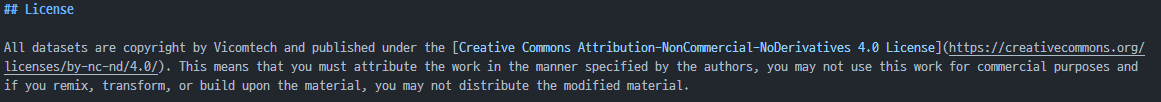

모든 데이터 세트의 저작권은 Vicomtech에 있으며 [크리에이티브 커먼즈 저작자표시-비영리-변경금지 4.0 라이선스](https://creativecommons.org/licenses/by-nc-nd/4.0/)에 따라 게시됩니다.   
즉, 저작자가 지정한 방식으로 저작물의 출처를 표시해야 하며, 이 저작물을 상업적 목적으로 사용할 수 없으며, 자료를 리믹스, 변형 또는 구축하는 경우 수정된 자료를 배포할 수 없습니다.

# 전체 총평:  
# 운전 상태를 보는데에는 탁월한 자료이지만, 졸음운전은 아니다...? → 학습에 사용하진 않아도 될듯